In [1]:
%matplotlib notebook

import json
import numpy as np
import numpy.random as npr
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.ticker as mpt

from ast import literal_eval

In [2]:
BURN_IN = 20

base_parameters = {
    'k_a': 0.002,
    'k_d': 0.1,
    'mu': 3.0,
    'kappa': 1.0,
    'gamma': 0.04,
    'diffusion': 0.6,
    'time_step': 0.1,
    'cell_radius': 6.0,
    'nucleus_radius': 2.5,
}

def log_value(p, name=None):
    return (np.log10(base_parameters[name]) if name else 0) + p * np.log10(2)

def exp_value(p, name=None):
    return (p - (np.log10(base_parameters[name]) if name else 0))/np.log10(2)


def get_data(filename):
    with open(filename, 'r') as f:
        data = {model: {literal_eval(k): v for k, v in lklh.items()}
                for model, lklh in json.load(f).items()}
    return data

params = {'legend.fontsize': 20,
          #'figure.figsize': (6, 6),
         'figure.figsize': (8, 3),
         'figure.titlesize': 28,
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'text.usetex':True,
         'figure.autolayout':False,
         }

plt.rcParams.update(params)

import scipy.interpolate as sci
import matplotlib.colors as colors


for filename in [
    'kg/lklh_kg_all_hh.json',
    'kg/lklh_kg_all_ll.json',
    'kg/lklh_kg_all_hmh.json',
    'kg/lklh_kg_all_hml.json',
    'kg/lklh_kg_all_hl.json',
    'kg/lklh_kg_P_hh.json',
    'kg/lklh_kg_P_hl.json',
    'kg/lklh_kg_P_lh.json',
    'kg/lklh_kg_P_ll.json',
    'kg/lklh_kg_RNA_hh.json',
    'ssAdv/lklh_ssAdv_all_hh.json',
    'ssAdv/lklh_ssAdv_all_ll.json',
    'ssAdv/lklh_ssAdv_P_hh.json',
    'ssAdv/lklh_ssAdv_P_hl.json',
    'ssAdv/lklh_ssAdv_P_lh.json',
    'ssAdv/lklh_ssAdv_P_ll.json',
    'ssAdv/lklh_ssAdv_RNA_hh.json',
    'ss/lklh_ss_all_hh.json',
    'ss/lklh_ss_all_ll.json',
    'ss/lklh_ss_P_hh.json',
    'ss/lklh_ss_P_hl.json',
    'ss/lklh_ss_P_lh.json',
    'ss/lklh_ss_P_ll.json',
    'ss/lklh_ss_RNA_hh.json',
]:
    with open(filename, 'r') as f:
        data = {model: {literal_eval(k): v for k, v in lklhs.items()}
                for model, lklhs in json.load(f).items()}

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
    #fig.tight_layout(w_pad=0)

    for i, solver in enumerate(['WMM', 'CBM', 'smoldyn']):
        min_x = log_value(min(data[solver].keys(), key=lambda t: t[1])[1])
        max_x = log_value(max(data[solver].keys(), key=lambda t: t[1])[1])
        min_D = log_value(min(data[solver].keys(), key=lambda t: t[0])[0], 'diffusion')
        max_D = log_value(max(data[solver].keys(), key=lambda t: t[0])[0], 'diffusion')

        raw_grid = np.array([[log_value(chi), log_value(D, 'diffusion'), lklh]
                             for ((D, chi, k_d), lklh) in data[solver].items()
                            if k_d == 0])

        XY = raw_grid[:, :2]
        Z = raw_grid[:, 2]

        xi, yi = np.mgrid[min_x:max_x:100j, min_D:max_D:100j]
        grid_z2 = sci.griddata(XY, Z, (xi, yi) , method='nearest')

        default_uni = 1/50
        max_range = 200

        pcm = ax[i].imshow(np.log(grid_z2.T/default_uni), extent=(min_x, max_x, min_D, max_D),
                   #vmin=0, vmax=max_range + default_uni,
                   norm=colors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=np.log(200)),
                   #norm=colors.LogNorm(vmin=0.1, vmax=max_range),
                   origin='lower', cmap='RdBu_r')

        if not i:
            ax[i].set_ylabel('Diffusion ($\mu m^2$ min$^{-1}$)')

        ax[i].set_xlabel('$\chi$')

        ax[i].set_title(f"{solver}")

        xticks = list(range(int(np.ceil(min_x)), int(np.floor(max_x))+1))
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels([f'$10^{{{t}}}$' for t in xticks])
        ax[i].xaxis.set_minor_locator(mpt.FixedLocator(sum([[np.log10(i*c) for i in range(2,10)] for c in [0.001, 0.01, 0.1, 1, 10]],[])))

        yticks = list(range(int(np.ceil(min_D)), int(np.floor(max_D))+1))
        ax[i].set_yticks(yticks)
        ax[i].set_yticklabels([f'$10^{{{t}}}$' for t in yticks])
        ax[i].yaxis.set_minor_locator(mpt.FixedLocator(sum([[np.log10(i*c) for i in range(2,10)] for c in [0.001, 0.01, 0.1, 1, 10]],[])))

    cb = fig.colorbar(pcm, ax=ax[:], location='right', shrink=1)
    cb.set_label('Likelihood Ratio')
    fig.suptitle(filename.replace('_', ' '))
    plt.savefig(f"{filename}.png")

<IPython.core.display.Javascript object>


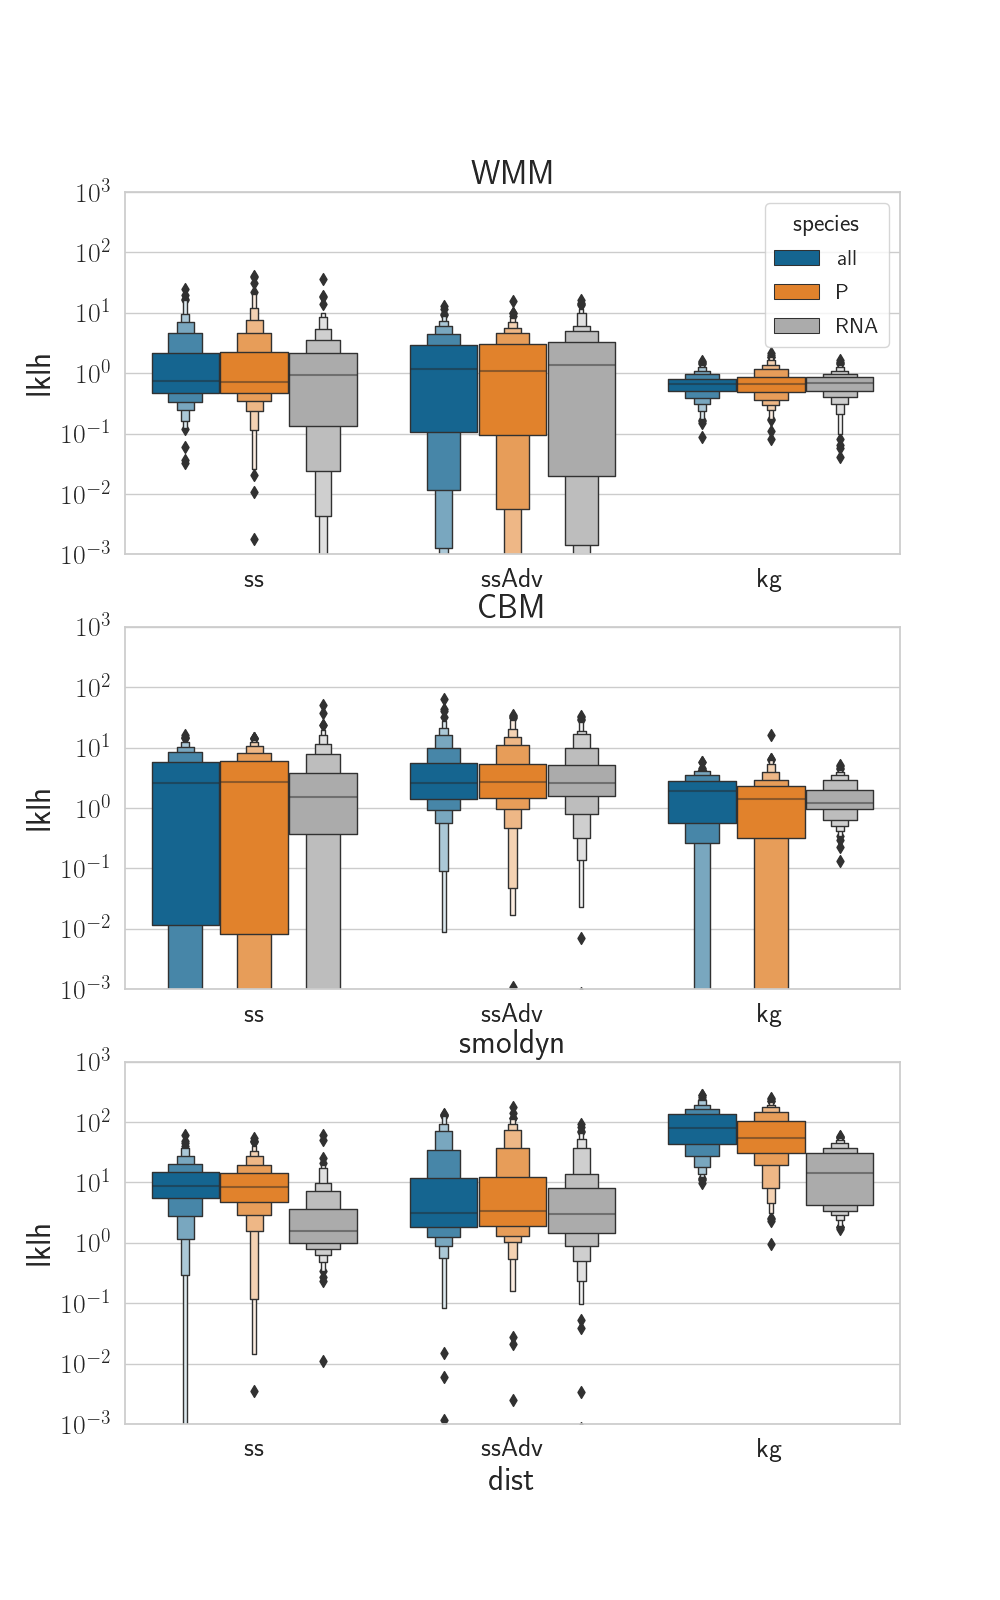

In [3]:
params = {
    'legend.fontsize': 16,
    'legend.title_fontsize': 18,
    'figure.figsize': (10, 16),
    'figure.titlesize': 28,
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'text.usetex':True,
    'figure.autolayout':False,
}

import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
plt.style.use('tableau-colorblind10')

plt.rcParams.update(params)

fig, axes = plt.subplots(3, 1, sharex=False, sharey=False)

solvers = ['WMM', 'CBM', 'smoldyn']

default_uni = 1/50

for i, (ax, solver) in enumerate(zip(axes, solvers)):
    traj = 'h'
    tsamp = 'h'
    
    labels = [
        (species, dist)
        for species in ['all', 'P', 'RNA']
        for dist in ['ss', 'ssAdv', 'kg']
    ]

    lklh = [
            (v/default_uni, species, dist)
        for species, dist in labels
        for (_, _, k_d), v in get_data(
                '{dist}/lklh_{dist}_{species}_{traj}{tsamp}.json'.format(
                    dist=dist, species=species, traj=traj, tsamp=tsamp)
            )[solver].items() if k_d == 0
    ]

    df_lklh = pd.DataFrame(lklh, columns=['lklh', 'species', 'dist'])

    sns.boxenplot(ax=ax, data=df_lklh, y='lklh', hue='species', x='dist')

    ax.set_yscale('log')
    ax.set_ylim(1.e-3, 1.e3)
    ax.set_title(solver)
    if i != 0:
        ax.legend().set_visible(False)
    if i != 2:
        ax.set_xlabel(None)

plt.savefig("RNAvsP_lklh.png", dpi=300)

<IPython.core.display.Javascript object>


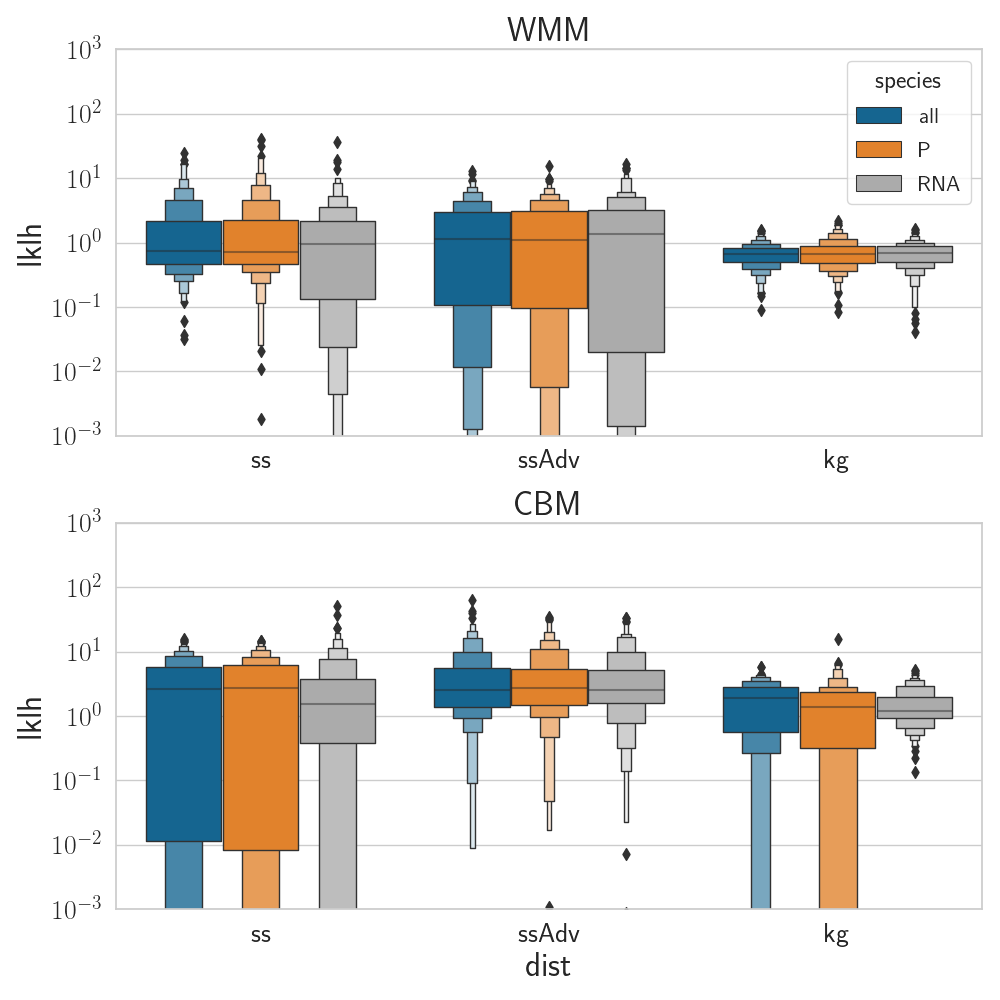

<IPython.core.display.Javascript object>


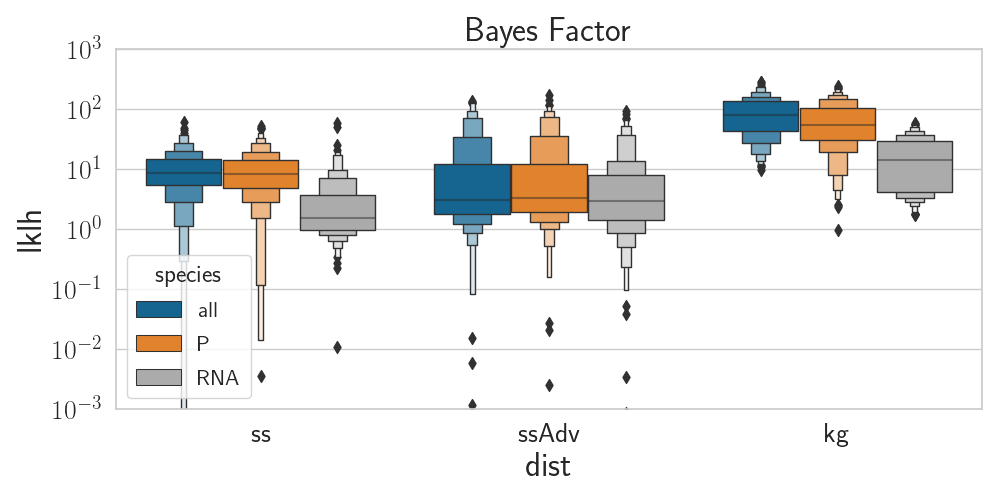

In [7]:
params = {
    'legend.fontsize': 16,
    'legend.title_fontsize': 18,
    'figure.figsize': (10, 16),
    'figure.titlesize': 28,
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'text.usetex':True,
    'figure.autolayout':False,
}

import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
plt.style.use('tableau-colorblind10')

plt.rcParams.update(params)

default_uni = 1/50

solvers_groups = [['WMM', 'CBM'], ['smoldyn']]

for solvers in solvers_groups:
    fig, axes = plt.subplots(len(solvers), 1, sharex=False, sharey=True, figsize=(10, 5*len(solvers)))

    if len(solvers) == 1:
        axes = [axes]

    for i, (ax, solver) in enumerate(zip(axes, solvers)):
        traj = 'h'
        tsamp = 'h'

        labels = [
            (species, dist)
            for species in ['all', 'P', 'RNA']
            for dist in ['ss', 'ssAdv', 'kg']
        ]

        lklh = [
                (v/default_uni, species, dist)
            for species, dist in labels
            for (_, _, k_d), v in get_data(
                    '{dist}/lklh_{dist}_{species}_{traj}{tsamp}.json'.format(
                        dist=dist, species=species, traj=traj, tsamp=tsamp)
                )[solver].items() if k_d == 0
        ]

        df_lklh = pd.DataFrame(lklh, columns=['lklh', 'species', 'dist'])

        sns.boxenplot(ax=ax, data=df_lklh, y='lklh', hue='species', x='dist')

        ax.set_yscale('log')
        ax.set_ylim(1.e-3, 1.e3)
        if len(solvers) > 1:
            ax.set_title(solver)
        else:
            ax.set_title('Bayes Factor')
        if i != 0:
            ax.legend().set_visible(False)
        if i != len(solvers) - 1:
            ax.set_xlabel(None)

    fig.tight_layout()

    plt.savefig(f"RNAvsP{'-'.join(solvers)}_lklh.pdf", dpi=300)